# How to Scale Numerical Data
link: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

The two most popular techniques for scaling numerical data prior to modeling are normalization and
standardization. 

Normalization scales each input variable separately to the range 0-1, which is
the range for floating-point values where we have the most precision.

 Standardization scales
each input variable separately by subtracting the mean (called centering) and dividing by the
standard deviation to shift the distribution to have a mean of zero and a standard deviation of
one.

## Data Normalization
Normalization is a rescaling of the data from the original range so that all values are within the
new range of 0 and 1. 

Normalization requires that you know or are able to accurately estimate
the minimum and maximum observable values. You may be able to estimate these values from
your available data.

You can normalize your dataset using
the scikit-learn object `MinMaxScaler`. Good practice usage with the `MinMaxScaler` and other
scaling techniques is as follows:
- Fit the scaler using available training data. For normalization, this means the
training data will be used to estimate the minimum and maximum observable values. This
is done by calling the fit() function.
- Apply the scale to training data. This means you can use the normalized data to
train your model. This is done by calling the transform() function.
- Apply the scale to data going forward. This means you can prepare new data in the
future on which you want to make predictions.

In [1]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


## Data Standardization

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed
values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean
value or centering the data.

Standardization assumes that your observations fit a Gaussian distribution (bell curve)
with a well-behaved mean and standard deviation.

In [2]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000

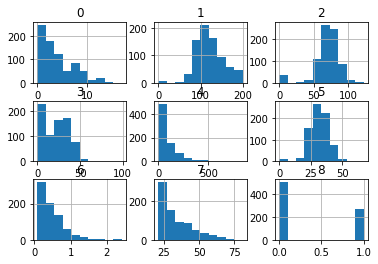

In [4]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "../../Datasets/pima-indians-diabetes.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

In [8]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype( 'float32' )
y = LabelEncoder().fit_transform(y.astype( 'str' ))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring= 'accuracy' , cv=cv, n_jobs=-1)
# report model performance
print( ' Accuracy: %.3f (%.3f) ' % (mean(n_scores), std(n_scores)))

 Accuracy: 0.717 (0.040) 


### MinMaxScaler Transform

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.168179    0.204015    0.348958  
std      0.141473    0.196004    0.476951  
min      0.000000    0.000000    0.000000  
25%      0.070773    0.050000    0.000000  
50%   

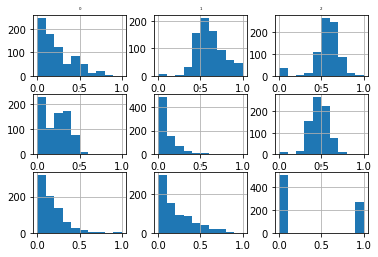

In [10]:
from pandas import DataFrame
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### StandardScaler Transform

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   5.493291e-17 -3.411623e-17  2.032879e-18  1.763636e-17  1.937108e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7             8  
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  
mean  -4.257301e-17  2.399701e-17  4.770490e-18  2.353442e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+0

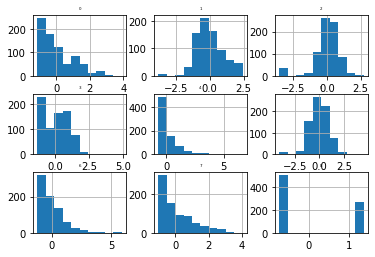

In [12]:
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

### IQR Robust Scaler Transform
Outliers can skew a probability distribution and make data scaling using standardization
difficult as the calculated mean and standard deviation will be skewed by the presence of
the outliers. 

One approach to standardizing input variables in the presence of outliers is to
ignore the outliers from the calculation of the mean and standard deviation, then use the
calculated values to scale the variable. This is called robust standardization or robust data
scaling. 

This can be achieved by calculating the median (50th percentile) and the 25th and
75th percentiles. The values of each variable then have their median subtracted and are divided
by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles

The robust scaler transform is available in the scikit-learn Python machine learning library via
the RobustScaler class. The with centering argument controls whether the value is centered
to zero (median is subtracted) and defaults to True. The with scaling argument controls
whether the value is scaled to the IQR (standard deviation set to one) or not and defaults to
True.

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.169010    0.094413   -0.160807   -0.076986    0.387422   -0.000798   
std      0.673916    0.775094    1.075323    0.498507    0.905650    0.847759   
min     -0.600000   -2.836364   -4.000000   -0.718750   -0.239686   -3.440860   
25%     -0.400000   -0.436364   -0.555556   -0.718750   -0.239686   -0.505376   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.600000    0.563636    0.444444    0.281250    0.760314    0.494624   
max      2.800000    1.987879    2.777778    2.375000    6.408644    3.774194   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.259807    0.249464    0.348958  
std      0.866219    0.691778    0.476951  
min     -0.769935   -0.470588    0.000000  
25%     -0.336601   -0.294118    0.000000  
50%   

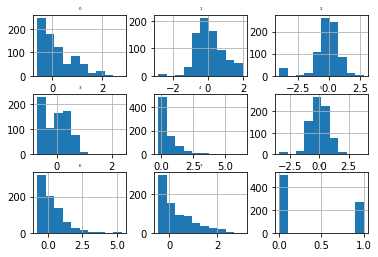

In [14]:
from sklearn.preprocessing import RobustScaler
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
fig = dataset.hist(xlabelsize=10, ylabelsize=10)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()